In [20]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

## For 2024 

### Data Importation and Validation 

In [2]:
def load_data(file: str, season: int):
    # file:
    # parameters:
    # "team_stats" for team statistics table
    # "teams" for team data table
    with open(f'../data/{season}/{file}_{season}.pkl', 'rb') as f:
        data = pickle.load(f)
    return data

In [3]:
team_stats_2024 = load_data('team_stats', 2024)
teams_2024 = load_data('teams', 2024)

team_stats_2024.info()

<class 'pandas.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              20 non-null     int64
 1   form            20 non-null     str  
 2   fixture_hw      20 non-null     int64
 3   fixtures_aw     20 non-null     int64
 4   fixtures_hl     20 non-null     int64
 5   fixtures_al     20 non-null     int64
 6   fixtures_hd     20 non-null     int64
 7   fixtures_ad     20 non-null     int64
 8   goals_h         20 non-null     int64
 9   goals_a         20 non-null     int64
 10  conceded_h      20 non-null     int64
 11  conceded_a      20 non-null     int64
 12  clean_sheet_h   20 non-null     int64
 13  clean_sheet_a   20 non-null     int64
 14  fts_h           20 non-null     int64
 15  fts_a           20 non-null     int64
 16  penalty_scored  20 non-null     int64
 17  penalty_missed  20 non-null     int64
 18  cards_yellow    20 non-null     int64
 19  

In [10]:
teams_2024['id'] = teams_2024.index
teams_2024 = teams_2024.reset_index(drop=True)
teams_2024.head()

,name,code,country,founded,national,logo,id
0,Manchester United,MUN,England,1878,False,https://media.api-sports.io/football/teams/33.png,33
1,Newcastle,NEW,England,1892,False,https://media.api-sports.io/football/teams/34.png,34
2,Bournemouth,BOU,England,1899,False,https://media.api-sports.io/football/teams/35.png,35
3,Fulham,FUL,England,1879,False,https://media.api-sports.io/football/teams/36.png,36
4,Wolves,WOL,England,1877,False,https://media.api-sports.io/football/teams/39.png,39


In [13]:
team_data_2024 = teams_2024.merge(team_stats_2024, on='id', how='left')
team_data_2024.head()

,name,code,country,founded,national,logo,id,form,fixture_hw,fixtures_aw,...,conceded_h,conceded_a,clean_sheet_h,clean_sheet_a,fts_h,fts_a,penalty_scored,penalty_missed,cards_yellow,cards_red
0,Manchester United,MUN,England,1878,False,https://media.api-sports.io/football/teams/33.png,33,WLLWDLDWLDWDWLLWLLLDWLWLLDWDWLDLLDLLLW,7,4,...,28,26,5,5,8,7,4,0,86,3
1,Newcastle,NEW,England,1892,False,https://media.api-sports.io/football/teams/34.png,34,WDWWLDDLLWWLDDLWWWWWWLWLLWLWWWWWLWDWLL,12,8,...,20,27,8,5,3,4,5,1,68,1
2,Bournemouth,BOU,England,1899,False,https://media.api-sports.io/football/teams/35.png,35,DDWLLWLWDWLLWWWDWDDWDWWLWLLDLLDWDDWLLW,8,7,...,16,30,7,2,5,3,6,1,97,3
3,Fulham,FUL,England,1879,False,https://media.api-sports.io/football/teams/36.png,36,LWDDWWLLDWWLDWDDDWDDLWLWWLWLWLWLLWLLWL,7,8,...,30,24,2,3,4,3,3,1,80,2
4,Wolves,WOL,England,1877,False,https://media.api-sports.io/football/teams/39.png,39,LLDLLLLLDDWWLLLLWWDLLLLWLWLDWWWWWWLLLD,6,6,...,32,37,5,3,3,4,0,0,79,2


In [14]:
team_data_2024.isna().sum()

name              0
code              0
country           0
founded           0
national          0
logo              0
id                0
form              0
fixture_hw        0
fixtures_aw       0
fixtures_hl       0
fixtures_al       0
fixtures_hd       0
fixtures_ad       0
goals_h           0
goals_a           0
conceded_h        0
conceded_a        0
clean_sheet_h     0
clean_sheet_a     0
fts_h             0
fts_a             0
penalty_scored    0
penalty_missed    0
cards_yellow      0
cards_red         0
dtype: int64

In [ ]:
# Aggregating Team performances
data_2024 = team_data_2024[['id', 'name', 'code']]
data_2024['wins'] = team_data_2024['fixture_hw'] + team_data_2024['fixture_hw']
data_2024['losses'] = team_data_2024["fixtures_hl"] + team_data_2024["fixtures_hl"]
data_2024['draws'] = team_data_2024["fixtures_hd"] + team_data_2024["fixtures_ad"]
data_2024['goals_scored'] = team_data_2024["goals_h"] + team_data_2024["goals_a"]
data_2024['goals_conceded'] = team_data_2024["conceded_h"] + team_data_2024["conceded_a"]
data_2024['clean_sheet'] = team_data_2024["clean_sheet_h"] + team_data_2024["clean_sheet_a"]
data_2024['ft_score'] = team_data_2024["fts_h"] + team_data_2024["fts_a"]
data_2024.head()

,id,name,code,wins,losses,draws,goals_scored,goals_conceded,clean_sheet,ft_score
0,33,Manchester United,MUN,14,18,9,44,54,10,15
1,34,Newcastle,NEW,24,10,6,68,47,13,7
2,35,Bournemouth,BOU,16,14,11,58,46,9,8
3,36,Fulham,FUL,14,14,9,54,54,5,7
4,39,Wolves,WOL,12,20,6,54,69,8,7


### Wins, losses and draws

In [26]:
print(f"The team with the most wins is {data_2024.loc[data_2024['wins'].idxmax(), 'name']} with {data_2024['wins'].max()} wins.")
print(f"The team with the least wins is {data_2024.loc[data_2024['wins'].idxmin(), 'name']} with {data_2024['wins'].min()} wins.")

The team with the most wins is Liverpool with 28 wins.
The team with the least wins is Southampton with 2 wins.


In [ ]:
print(f"The team with the most losses is {data_2024.loc[data_2024['losses'].idxmax(), 'name']} with {data_2024['losses'].max()} losses.")
print(f"The team with the least losses is {data_2024.loc[data_2024['losses'].idxmin(), 'name']} with {data_2024['losses'].min()} losses.")


In [ ]:
print(f"The team with the most draws is {data_2024.loc[data_2024['draws'].idxmax(), 'name']} with {data_2024['draws'].max()} draws.")
print(f"The team with the least draws is {data_2024.loc[data_2024['draws'].idxmin(), 'name']} with {data_2024['draws'].min()} draws.")

The team with the most draws is Everton with 15 draws.
The team with the least draws is Tottenham with 5 draws.


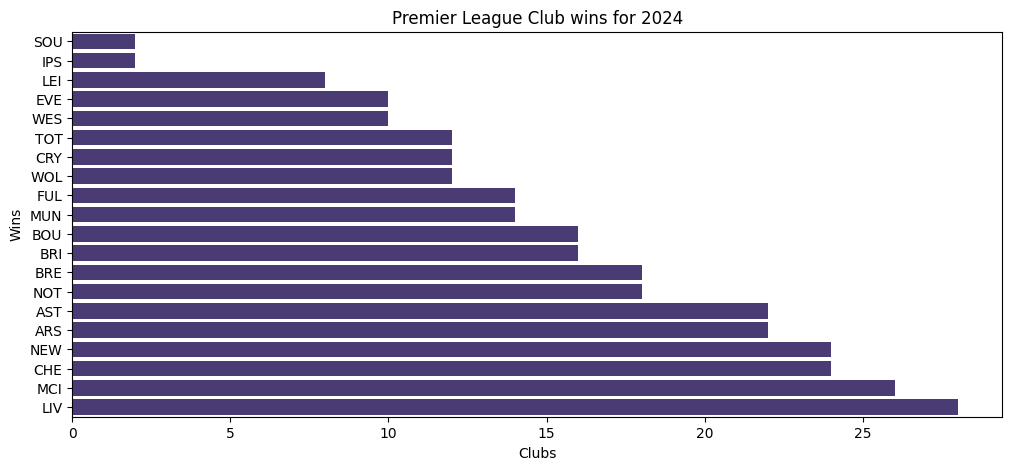

In [52]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='code', x='wins', data=data_2024.sort_values(by='wins', ascending=True), ax=ax, orient= 'h')
plt.title("Premier League Club wins for 2024")
plt.xlabel("Clubs")
plt.ylabel("Wins")
plt.show()


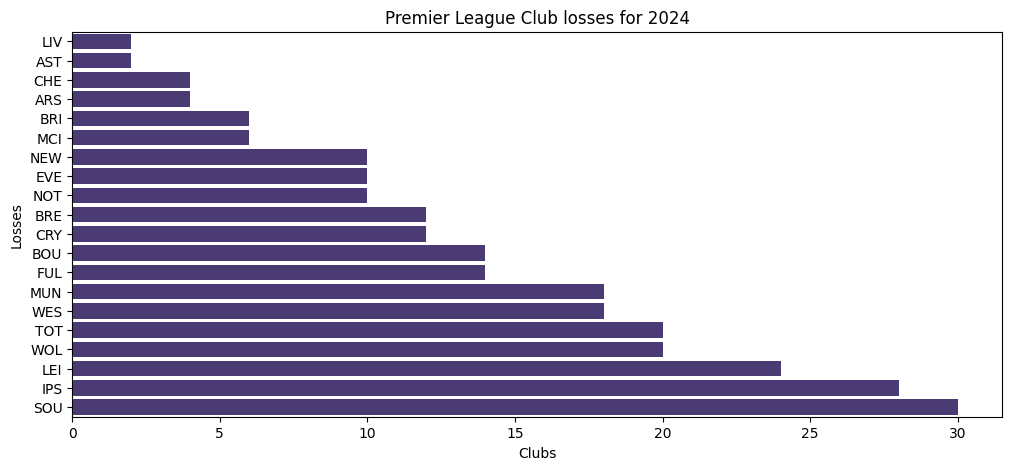

In [51]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='code', x='losses', data=data_2024.sort_values(by='losses', ascending=True), ax=ax, orient= 'h')
plt.title("Premier League Club losses for 2024")
plt.xlabel("Clubs")
plt.ylabel("Losses")
plt.show()

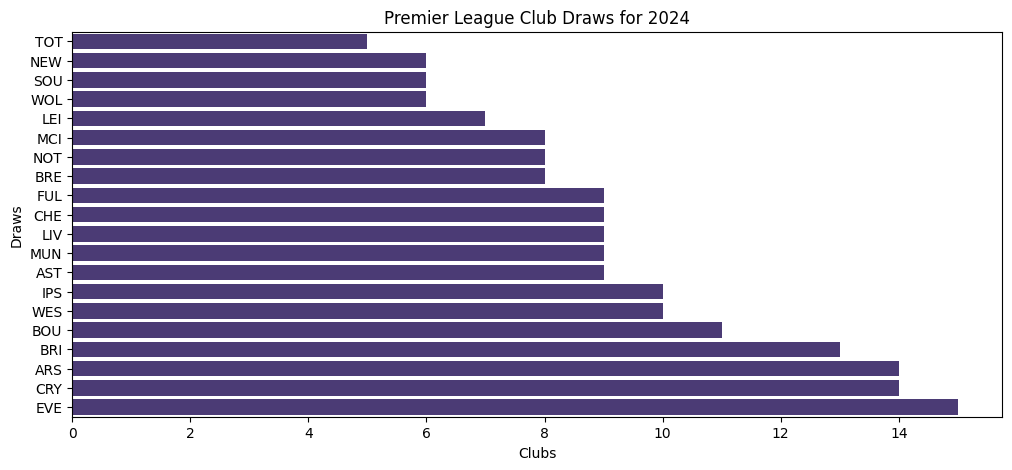

In [54]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='code', x='draws', data=data_2024.sort_values(by='draws', ascending=True), ax=ax, orient= 'h')
plt.title("Premier League Club Draws for 2024")
plt.xlabel("Clubs")
plt.ylabel("Draws")
plt.show()

### Goals

In [55]:
print(f"The Team with the most goals is {data_2024.loc[data_2024['goals_scored'].idxmax(), 'name']} with {data_2024['goals_scored'].max()} goals.")
print(f"The Team with the least goals is {data_2024.loc[data_2024['goals_scored'].idxmin(), 'name']} with {data_2024['goals_scored'].min()} goals.")


The Team with the most goals is Liverpool with 86 goals.
The Team with the least goals is Southampton with 26 goals.


In [58]:
print(f"The Team that conceded the most goals is {data_2024.loc[data_2024['goals_conceded'].idxmax(), 'name']} with {data_2024['goals_conceded'].max()} goals.")
print(f"The Team that conceded the least goals is {data_2024.loc[data_2024['goals_conceded'].idxmin(), 'name']} with {data_2024['goals_conceded'].min()} goals.")


The Team that conceded the most goals is Southampton with 86 goals.
The Team that conceded the least goals is Arsenal with 34 goals.


In [61]:
data_2024['goal_diff'] = data_2024['goals_scored'] - data_2024['goals_conceded']

In [62]:
print(f"The team with the highest goal difference is {data_2024.loc[data_2024['goal_diff'].idxmax(), 'name']} with {data_2024['goal_diff'].max()} goals.")
print(f"The team with the lowest goal difference is {data_2024.loc[data_2024['goal_diff'].idxmin(), 'name']} with {data_2024['goal_diff'].min()} goals.")

The team with the highest goal difference is Liverpool with 45 goals.
The team with the lowest goal difference is Southampton with -60 goals.


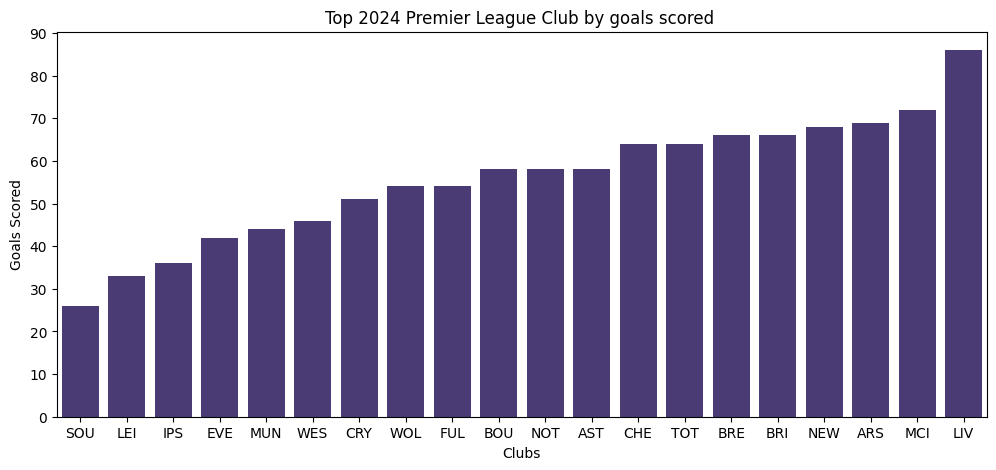

In [80]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='code', y='goals_scored', data=data_2024.sort_values(by='goals_scored', ascending=True), ax=ax)
ax.set_yticks(range(0, 100, 10))
plt.title("Top 2024 Premier League Club by goals scored ")
plt.xlabel("Clubs")
plt.ylabel("Goals Scored")
plt.show()


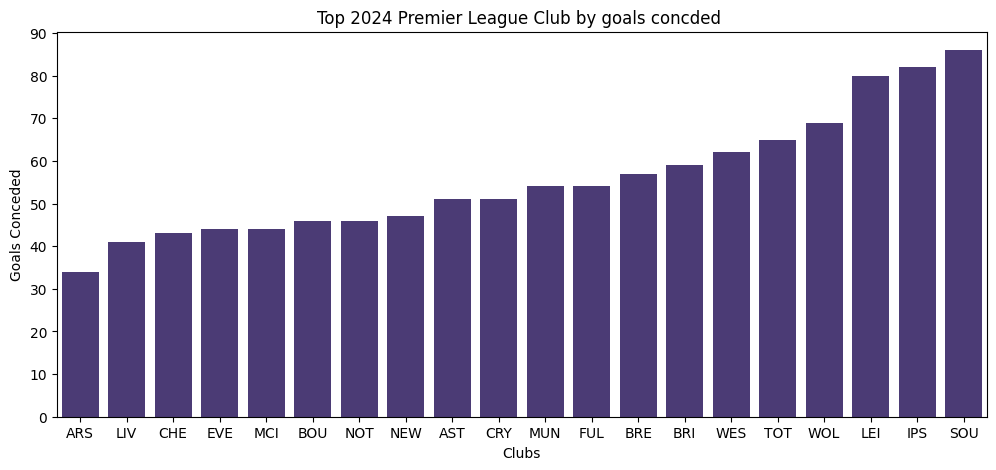

In [79]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x='code', y='goals_conceded', data=data_2024.sort_values(by='goals_conceded', ascending=True), ax=ax)
ax.set_yticks(range(0, 100, 10))
plt.title("Top 2024 Premier League Club by goals concded ")
plt.xlabel("Clubs")
plt.ylabel("Goals Conceded")
plt.show()


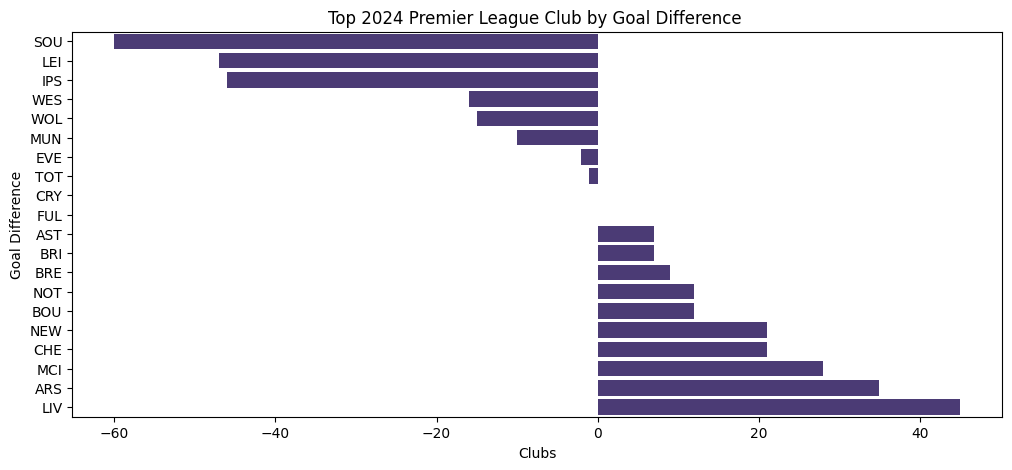

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(y='code', x='goal_diff', data=data_2024.sort_values(by='goal_diff', ascending=True), ax=ax)
plt.title("Top 2024 Premier League Club by Goal Difference ")
plt.xlabel("Clubs")
plt.ylabel("Goal Difference")
plt.show()


### Fail to Score & Clean Sheets
#### Fail To Score: A metric that shows how many matches a team failed to score a goal,
#### Clean Sheets: A metric that shows how many matches a team failed to concede a goal

In [82]:
print(f"The Team that failed to score a match the most is {data_2024['name'][data_2024['ft_score'].idxmax()]} with {data_2024['ft_score'].max()} matches")
print(f"The Team that has the most clean sheet is {data_2024['name'][data_2024['clean_sheet'].idxmax()]} with {data_2024['clean_sheet'].max()} matches")


The Team that failed to score a match the most is Leicester with 17 matches
The Team that has the most clean sheet is Liverpool with 14 matches


## For 2023

In [94]:
def data_wrangle(season: int):
    """
    Wrangle the data for the given season.
    """
    # Load Data
    data_stats = load_data("team_stats" , season)
    teams_data = load_data("teams", season)
    
    # merge files
    teams_data['id'] = teams_data.index
    teams_data = teams_data.reset_index(drop=True)
    data = teams_data.merge(data_stats, on='id', how='left')
    return data

In [96]:
data_2023 = data_wrangle(2023)
print(data_2023.isna().sum())
data_2023.head()

name              0
code              0
country           0
founded           0
national          0
logo              0
id                0
form              0
fixture_hw        0
fixtures_aw       0
fixtures_hl       0
fixtures_al       0
fixtures_hd       0
fixtures_ad       0
goals_h           0
goals_a           0
conceded_h        0
conceded_a        0
clean_sheet_h     0
clean_sheet_a     0
fts_h             0
fts_a             0
penalty_scored    0
penalty_missed    0
cards_yellow      0
cards_red         0
dtype: int64


,name,code,country,founded,national,logo,id,form,fixture_hw,fixtures_aw,...,conceded_h,conceded_a,clean_sheet_h,clean_sheet_a,fts_h,fts_a,penalty_scored,penalty_missed,cards_yellow,cards_red
0,Manchester United,MUN,England,1878,False,https://media.api-sports.io/football/teams/33.png,33,WLWLLWLWWLWWWLWLDLWLDWWWWLLWDLDDWDLLWW,10,8,...,28,30,4,5,4,5,6,0,83,1
1,Newcastle,NEW,England,1892,False,https://media.api-sports.io/football/teams/34.png,34,WLLLWWWDWDWLWWLLWLLLLWDWDLWLWDWWLWWDLW,12,6,...,22,40,8,2,0,5,8,0,78,1
2,Bournemouth,BOU,England,1899,False,https://media.api-sports.io/football/teams/35.png,35,DLLDDLLLLWLWWDWWWWLLDDLDLWDWWWLDLWWLLL,7,6,...,28,39,5,4,5,2,2,0,79,3
3,Fulham,FUL,England,1879,False,https://media.api-sports.io/football/teams/36.png,36,WLDLWDLWLDLLWLWWLLLWLDDWLWWLWDLLWLDDLW,9,4,...,24,37,6,4,7,6,2,0,84,4
4,Wolves,WOL,England,1877,False,https://media.api-sports.io/football/teams/39.png,39,LLWLLDWDWDLWLLWDLWWWDLWLWWLWLDLDLLWLLL,8,5,...,30,35,3,2,3,6,4,0,103,4
